Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


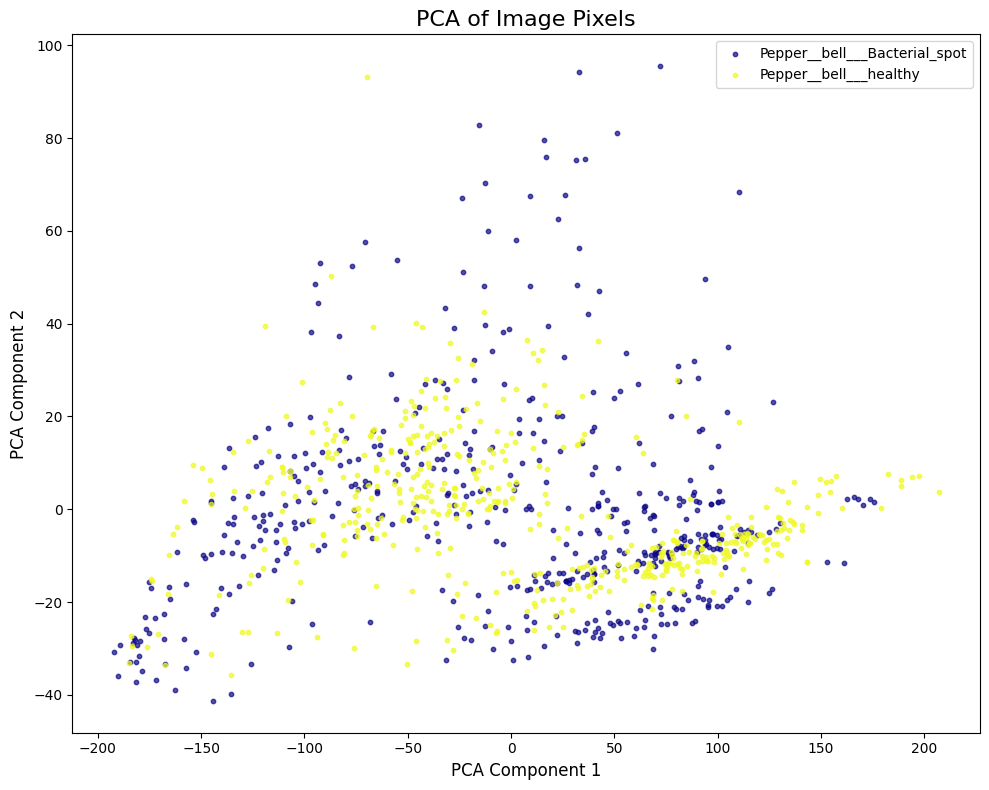

In [6]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to process selected folders for PCA
def process_selected_folders(source_directory, folders, sample_size=200):
    all_pixels = []
    labels = []

    for folder in folders:
        folder_path = os.path.join(source_directory, folder)
        if os.path.isdir(folder_path):
            images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sampled_images = random.sample(images, min(sample_size, len(images)))

            for image_name in sampled_images:
                image_path = os.path.join(folder_path, image_name)
                try:
                    image = Image.open(image_path).convert("RGB")
                    image = image.resize((32, 32))  # Resize to a smaller size
                    image_np = np.array(image)
                    pixels = image_np.reshape(-1, 3)
                    all_pixels.extend(pixels.tolist())
                    labels.extend([folder] * pixels.shape[0])  # Assign label to each pixel
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

    all_pixels = np.array(all_pixels)

    if len(all_pixels) == 0:
        print("No pixels collected. Check if images are available.")
        return None, None

    return all_pixels, labels

# Function to apply PCA and visualize the results with color differentiation
def apply_pca_and_visualize(data, labels, num_points=5000):  # Increase default to 1000 points
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    pixels_2d = pca.fit_transform(data)

    # Create a color map
    unique_labels = list(set(labels))
    colors = plt.cm.plasma(np.linspace(0, 1, len(unique_labels)))  # Use plasma colormap

    plt.figure(figsize=(10, 8))

    # Sample points to plot
    sampled_indices = random.sample(range(len(pixels_2d)), min(num_points, len(pixels_2d)))

    for i, label in enumerate(unique_labels):
        indices = [j for j in sampled_indices if labels[j] == label]
        plt.scatter(pixels_2d[indices, 0], pixels_2d[indices, 1], s=10, alpha=0.7, label=label, color=colors[i])

    plt.title("PCA of Image Pixels", fontsize=16)
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Directory path
source_directory = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'
selected_folders = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

# Process images and prepare for PCA (100 images total)
all_pixels, labels = process_selected_folders(source_directory, selected_folders, sample_size=50)

if all_pixels is not None:
    apply_pca_and_visualize(all_pixels, labels, num_points=1000)  # Adjust as needed
